# ライブラリのインポート

In [1]:
# google colab向け (コメントアウトする)
# !pip install japanize_matplotlib

In [33]:
# pandasをインポートする。一般的にpdと略す。
import pandas as pd

# japanize_matplotlibをインポートする
# japanize_matplotlibは日本語を表示するライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
#import japanize_matplotlib

In [ ]:
#Google colabの時は#を外す
#from google.colab import drive
#drive.mount('/content/gdrive/')

In [4]:
#pathを設定する
path = './'

#Google Colabの場合は#を外す
#path = '/content/gdrive/MyDrive/***/' #***はフォルダ名

In [6]:
df=pd.read_csv(path+'data_レポート用.csv', index_col=0)
df

,年,順位,球団,勝,防御率,打率,本塁打,盗塁,得点,失点,...,完封,無四球,被打率,援護点,援護率,WHIP,UC被安打,UC被打率,UC被本塁打,平均動員数
2011_1,2011,1,中日,75,2.46,0.228,82,41,419,410,...,5,5,0.225,413,2.89,1.08,586,0.225,37,29777
2011_2,2011,2,ヤクルト,70,3.36,0.244,85,43,484,504,...,5,2,0.246,474,3.36,1.24,552,0.252,48,18726
2011_3,2011,3,巨人,71,2.61,0.243,108,106,471,417,...,2,2,0.226,466,3.25,1.14,569,0.236,40,37736
2011_4,2011,4,阪神,68,2.83,0.255,80,62,482,443,...,5,1,0.220,481,3.40,1.13,543,0.229,35,40256
2011_5,2011,5,広島,60,3.22,0.245,52,65,439,496,...,5,1,0.238,432,3.06,1.20,555,0.237,41,21980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023_2,2023,2,広島,74,3.20,0.246,96,78,493,508,...,7,2,0.242,325,3.25,1.22,586,0.245,50,28538
2023_3,2023,3,DeNA,74,3.16,0.247,105,33,520,496,...,3,4,0.243,361,3.57,1.19,580,0.243,56,32126
2023_4,2023,4,巨人,71,3.40,0.252,164,48,523,507,...,3,3,0.231,322,3.35,1.18,539,0.228,54,38145
2023_5,2023,5,ヤクルト,57,3.66,0.239,123,62,534,567,...,3,1,0.248,366,3.96,1.23,570,0.255,67,27447


# レポート課題①
## df['投球回']の分数表示をfloat型にせよ

In [13]:
###コードを記載###

def convert_to_float(col_value: str) -> float:
    val_list = col_value.split(' ')
    if len(val_list) == 1:
        return float(col_value)
    integral_value, fraction = val_list
    molecule, denominator = fraction.split("/")
    return float(integral_value) + float(molecule) / float(denominator)

df['投球回'] = df['投球回'].apply(convert_to_float)
df['投球回']

2011_1    1282.333333
2011_2    1267.000000
2011_3    1284.333333
2011_4    1266.333333
2011_5    1270.666667
             ...     
2023_2    1275.000000
2023_3    1289.333333
2023_4    1276.333333
2023_5    1267.666667
2023_6    1287.333333
Name: 投球回, Length: 78, dtype: float64

# レポート課題②
## seabornを使って、順位と防御率の関係を表す箱ひげ図を作成せよ
## ただし、各順位をcolumnsとしたデータフレームdf_newを作成し、sns.boxplot(df_new)として、実行せよ

In [35]:
# df[['順位', '防御率']]をそのまま箱ひげ図の関数に入れても上手くいかないので、データを整形する
df_new = pd.DataFrame(df, columns=df['順位'].unique())
#df_new.rename(columns={1: '1位', 2: '2位', 3: '3位', 4: '4位', 5: '5位', 6: '6位'}, inplace=True)
#df_newのindex値と順位に合致する、df['防御率']を代入する
for rank in df['順位'].unique():
    rank_datas = df[df['順位'] == rank]
    indexs = rank_datas.index
    ERAs = rank_datas['防御率']
    df_new.loc[indexs, rank] = ERAs.values

df_new.rename(columns={1: '1位', 2: '2位', 3: '3位', 4: '4位', 5: '5位', 6: '6位'}, inplace=True)

###コードを記載(表示用)###
df_new

,1位,2位,3位,4位,5位,6位
2011_1,2.46,NaN,NaN,NaN,NaN,NaN
2011_2,NaN,3.36,NaN,NaN,NaN,NaN
2011_3,NaN,NaN,2.61,NaN,NaN,NaN
2011_4,NaN,NaN,NaN,2.83,NaN,NaN
2011_5,NaN,NaN,NaN,NaN,3.22,NaN
...,...,...,...,...,...,...
2023_2,NaN,3.20,NaN,NaN,NaN,NaN
2023_3,NaN,NaN,3.16,NaN,NaN,NaN
2023_4,NaN,NaN,NaN,3.40,NaN,NaN
2023_5,NaN,NaN,NaN,NaN,3.66,NaN


c:\Users\syu\Learning\Class_DataScienceEX\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


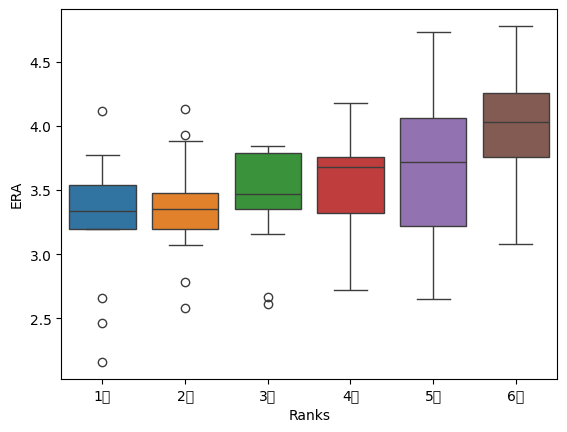

In [36]:
###コードを記載###
sns.boxplot(data=df_new)
plt.xlabel('Ranks')
plt.ylabel('ERA')
plt.show()